# Generating Plots 

### Code

In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import sklearn.cluster as cluster
import numpy as np
import math

import matplotlib.cm as cm
import matplotlib
from matplotlib.widgets import Cursor
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram


LKB = pd.read_excel (r'DR_Comparison.xlsx',
                    sheet_name='LKBPP screen dataset')
Clusters = pd.read_excel (r'DR_Comparison.xlsx',
                    sheet_name='Clustering')

descriptors = ['homo', 'lumo', 'pa', 'homo2', 'lumo2', 'pa2', 'he.w.pn', 'nhe', 'be.gla', 'ml.gla', 'dmd.gla', 'd.d1rgla', 'd.d2rgla', 'drd1rgla', 
               'drd2rgla', 'nbo.glaf', 'be.pd', 'ml.pd', 'dmd.pd', 'd.d1r.pd', 'd.d2r.pd', 'd.rd1rpd', 'd.rd2rpd', 'nbo.pd.f', 'dppd.d1', 'dppd.d2', 
               'dpzn.d1', 'dpzn.d2']

C:\Users\rn22569\.conda\envs\book-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Scale the data
scaler = StandardScaler()
data_std = scaler.fit_transform(LKB[descriptors])

In [3]:
#Definition of each dimensionality reduction technique (it take a while to run because of tsne)
pca = PCA(n_components=7).fit_transform(data_std)
pca_df_scale = pd.DataFrame(pca, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7'])

tsne = TSNE(n_components=10, verbose=0, perplexity=12, n_iter=5000, learning_rate="auto", method='exact', random_state=42).fit_transform(data_std)
tsne_df_scale = pd.DataFrame(tsne, columns=['tSNE1', 'tSNEe2', 'tSNE3','tSNE4', 'tSNE5', 'tSNE6', 'tSNE7', 'tSNE8', 'tSNE9', 'tSNE10'])

umap = umap.UMAP(n_neighbors=15,min_dist=0.5,n_components=10,random_state=42).fit_transform(data_std)
umap_df_scale = pd.DataFrame(umap, columns=['UMAP1', 'UMAP2', 'UMAP3', 'UMAP4', 'UMAP5', 'UMAP6', 'UMAP7', 'UMAP8', 'UMAP9', 'UMAP10'])

DRs = {'PCA':{'DRdf': pca_df_scale}, 'tSNE':{'DRdf': tsne_df_scale},
       'UMAP':{'DRdf': umap_df_scale}}

DRs['PCA']['DRdf']['PC1'] = DRs['PCA']['DRdf']['PC1']*-1

C:\Users\rn22569\.conda\envs\book-env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [4]:
subs_picked = ["Ph", "Me", "OPh" , 'tBu', "C6F5", 'p-Tol' ]
backbones_picked = ['A', 'B', 'K', 'W'] 
#subset = LKB[(LKB['Substituent'].isin(subs_picked)) & (LKB['Backbone'].isin(backbones_picked))]

subset = LKB[LKB.index.isin([0,11, 12, 17, 18, 111, 248, 116])]
subset

,No.,var00001,Substituent,Backbone length,Backbone,homo,lumo,pa,homo2,lumo2,...,dmd.pd,d.d1r.pd,d.d2r.pd,d.rd1rpd,d.rd2rpd,nbo.pd.f,dppd.d1,dppd.d2,dpzn.d1,dpzn.d2
0,1,1,Me,3,A,-0.19050,0.03270,233.000,-0.19050,0.03270,...,75.5,-0.019,-0.019,8.1,8.0,-0.8209,-0.003,-0.001,0.002,0.010
11,12,1,Me,4,B,-0.19050,0.03270,233.000,-0.19050,0.03270,...,88.4,-0.023,-0.023,6.4,6.3,-0.8560,-0.007,-0.008,-0.058,-0.062
12,13,1,tBu,4,B,-0.17880,0.02250,245.670,-0.17880,0.02250,...,90.8,-0.006,-0.006,1.9,1.9,-0.7895,0.053,0.054,-0.036,-0.041
17,18,3,Ph,4,B,-0.18900,-0.04770,239.200,-0.18900,-0.04770,...,87.5,-0.014,-0.015,4.0,4.0,-0.7801,0.028,0.027,-0.037,-0.036
18,19,2,C6F5,4,B,-0.21657,-0.07767,222.356,-0.21657,-0.07767,...,87.5,-0.015,-0.015,3.1,3.1,-0.7096,-0.003,-0.002,0.031,0.021
111,112,1,tBu,6,K,-0.18216,-0.03031,247.130,-0.18216,-0.03031,...,104.5,0.007,0.007,0.3,0.4,-0.7241,0.106,0.088,-0.051,-0.039
116,117,3,Ph,6,K,-0.18900,-0.04770,239.200,-0.18900,-0.04770,...,100.7,-0.012,-0.011,1.5,1.6,-0.7390,0.044,0.045,-0.058,-0.065
248,249,3,Ph,7,W,-0.18690,-0.05060,241.300,-0.18690,-0.05060,...,108.2,-0.004,-0.005,0.8,0.9,-0.6390,0.120,0.120,-0.071,-0.080


In [5]:
#Definition of k means clustering for the selected DR:
def kmeans(k,DR_df_scale):
    """input: k = the number of clusters
              Dr_df_scale = the selected DR technique
       the function: performs k means and provide the silhouette coefficient for the selected DR technique
       output: silhouette coefficient"""
    kmeans_DR_scale = KMeans(n_clusters=k, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(DR_df_scale)
    kmeans_scaled_Silhouette_Score = silhouette_score(DR_df_scale, kmeans_DR_scale.labels_, metric='euclidean')
    kmeans_labels = kmeans_DR_scale.labels_
    #clusters_DR_scale = pd.concat([DR_df_scale, pd.DataFrame({'DR_clusters':kmeans_labels})], axis=1)
    return kmeans_scaled_Silhouette_Score, kmeans_labels

# This doesn't return the sihloette score

In [6]:
#Definition of hierarchical clustering for the selected DR: 
def hierarchical(n,DR_df_scale):
    cluster_hie = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    cluster_hie.fit_predict(DR_df_scale)
    #hierarchical_labels=cluster_hie.labels_
    hierarchical_scaled_Silhouette_Score = silhouette_score(DR_df_scale, cluster_hie.labels_, metric='euclidean')
    hierarchical_labels=cluster_hie.labels_
    return hierarchical_scaled_Silhouette_Score, hierarchical_labels

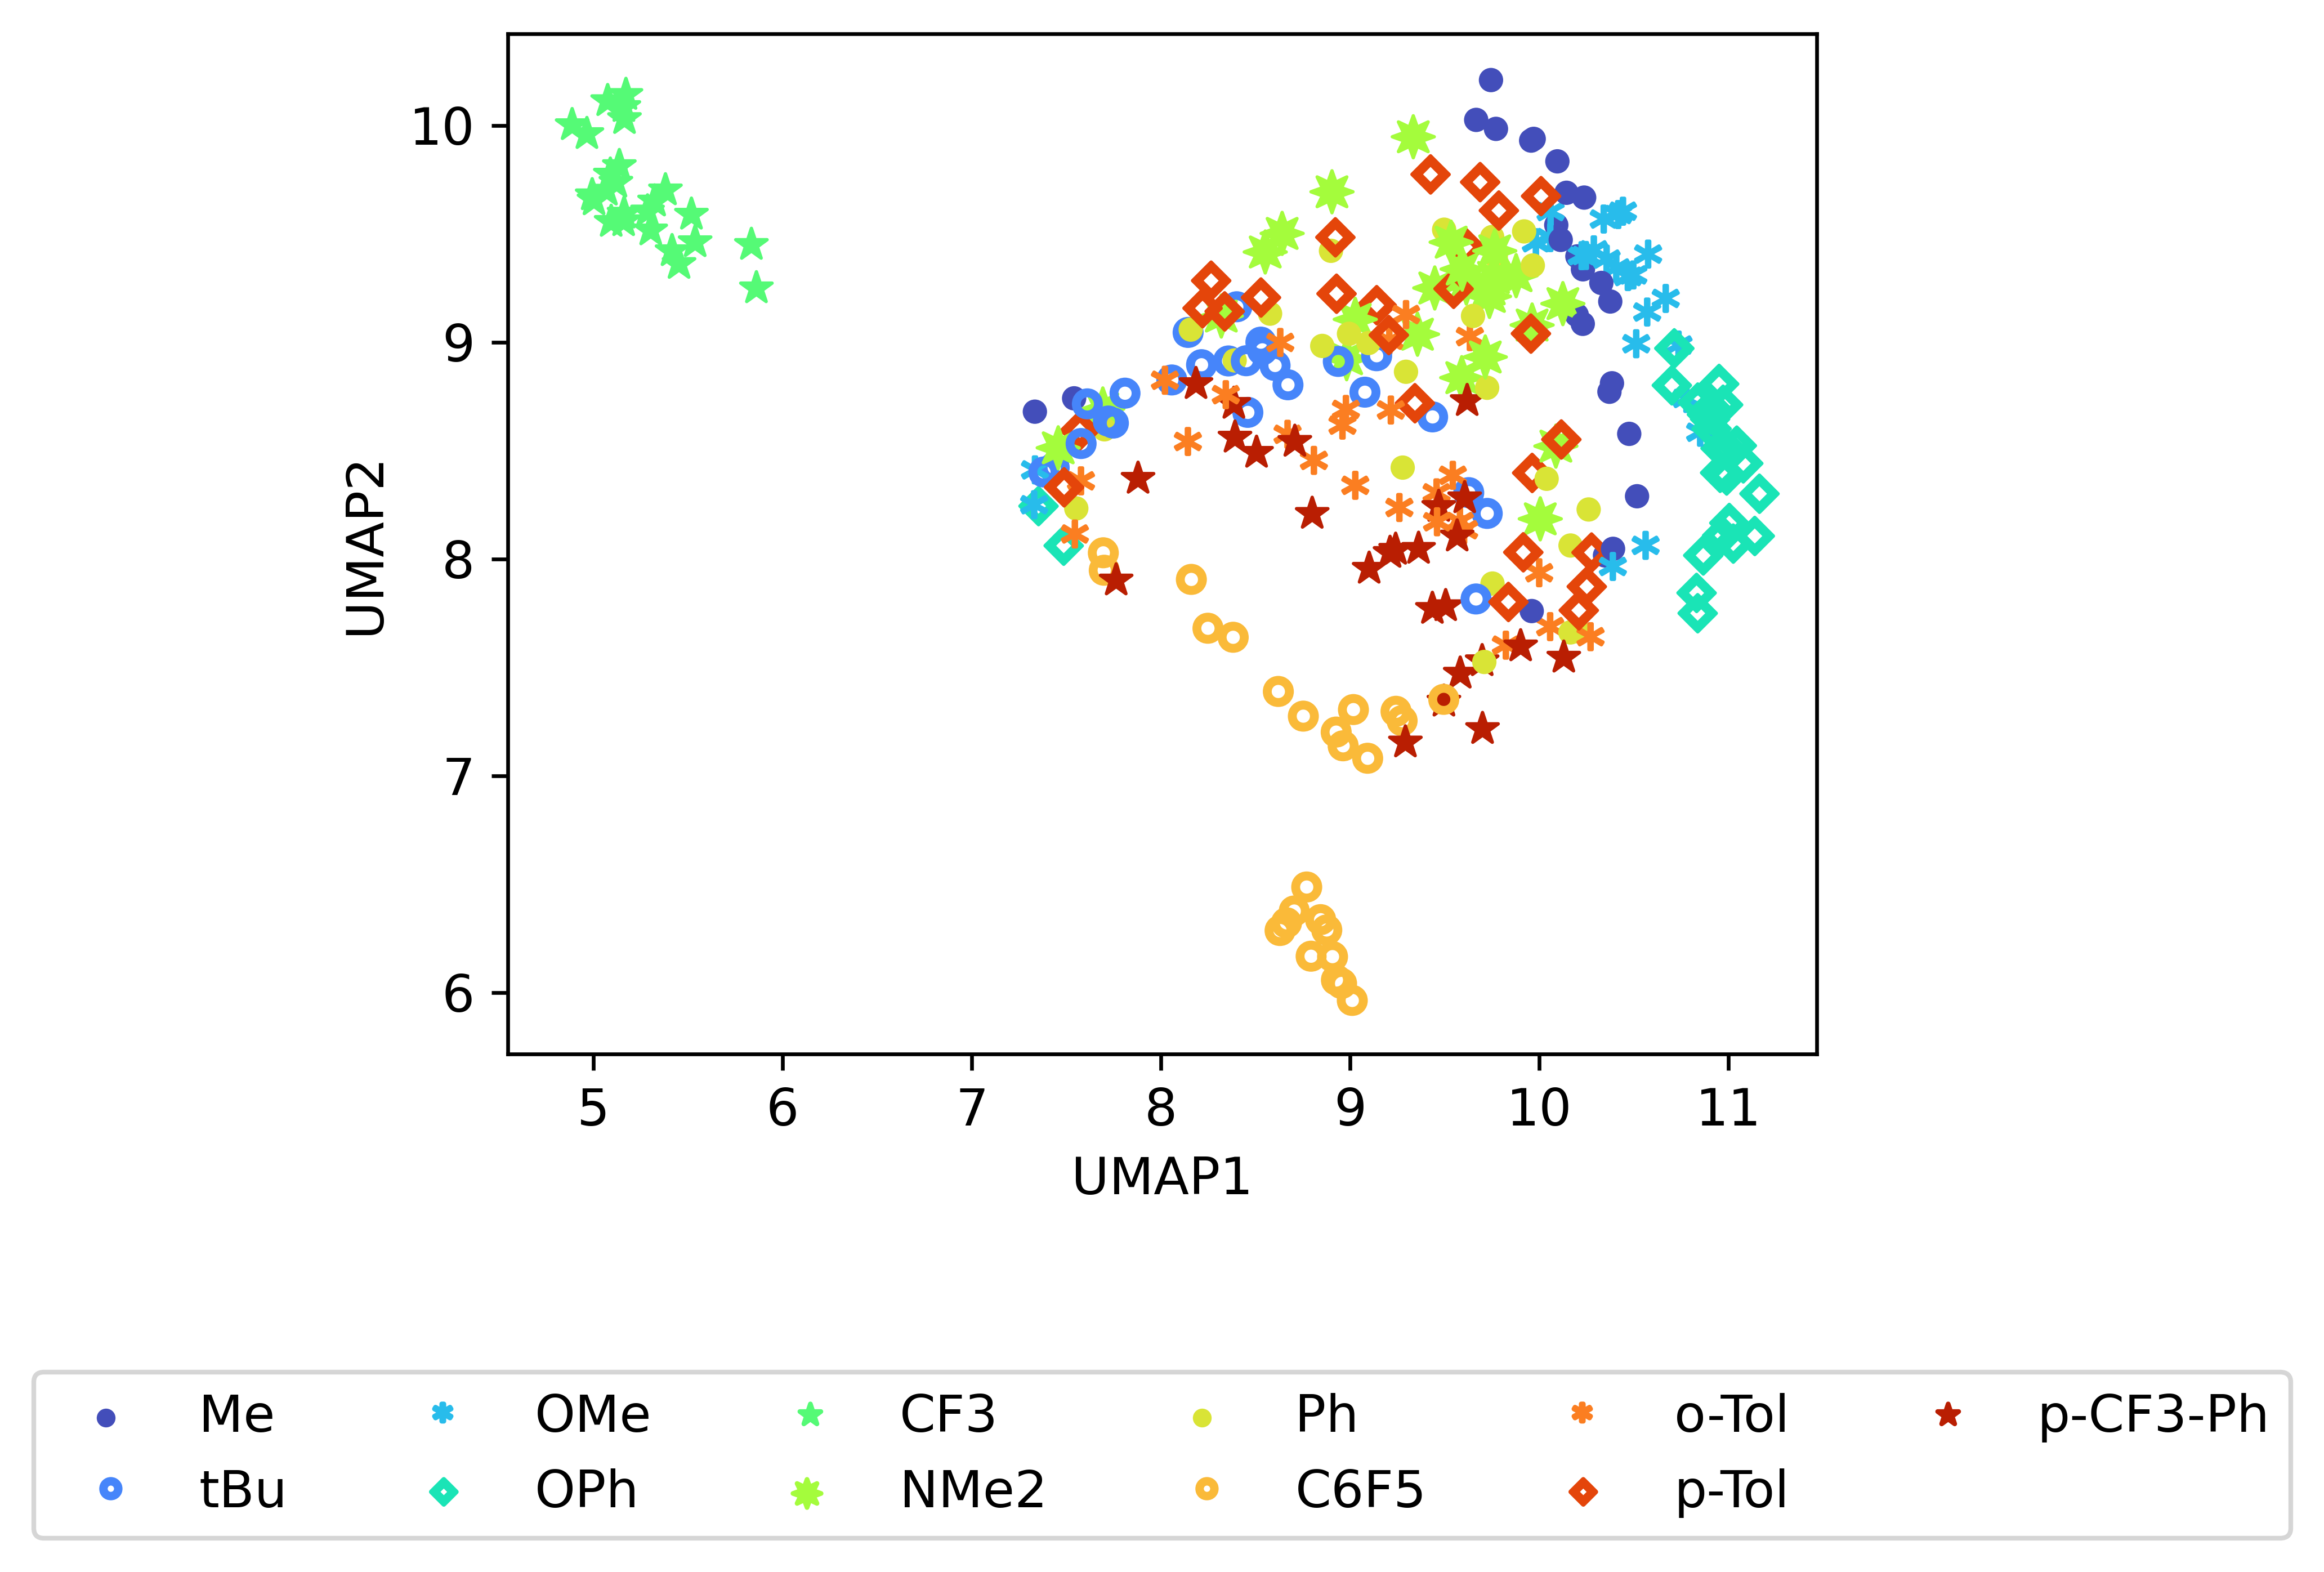

In [7]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 11})

DR_t = 'UMAP' # 'UMAP' or 'PCA'

df=DRs[DR_t]['DRdf']

hue=LKB['Substituent'] # 'Substituent' or 'Backbone length'

palette=sns.color_palette("turbo", n_colors=len(hue.unique()))

style_str = 'Substituent' # 'Substituent' or 'Backbone length'
style=LKB[style_str] 
if style_str == 'Substituent':
    markers = {'Me': ".", 'tBu': "$\circ$", 'OMe': "$*$", 'OPh': "$\diamond$", 'CF3': "$\star$", 'NMe2': (8,1,0), 
               'Ph': ".", 'C6F5': "$\circ$", 'o-Tol': "$*$",  'p-Tol': "$\diamond$", 'p-CF3-Ph': "$\star$"}
else:
    markers = {3: ".", 4: "$\circ$", 5: "$*$", 6: "$\diamond$", 7: "$\star$", 8: (8,1,0)}

fig = plt.figure(figsize = (5,4), dpi = 600)
ax = fig.add_subplot()
sns.scatterplot(data=df,
    x=df[df.columns[0]],
    y=df[df.columns[1]],
    color="black",
    style=style,
    markers=markers,
    hue=hue,
    palette=palette, 
    ec="face",
    s=80, #s=20,
    alpha=1, #.25
    legend=True)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=6) 
plt.xlabel(df.columns[0].upper())
plt.ylabel(df.columns[1].upper())
plt.show()

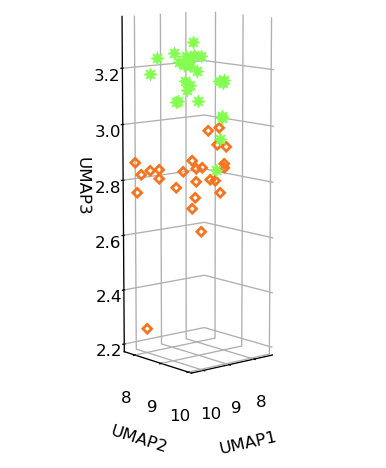

In [8]:
#%matplotlib notebook 
%matplotlib inline

diff_Ligs = LKB[(LKB["Substituent"]=='p-Tol') | (LKB["Substituent"]=='NMe2')]

diff_Ligs_index = diff_Ligs.index.to_list()

DR_t = 'UMAP'
hue_str="Substituent"

pal = cm.get_cmap('turbo', 12).colors

pal = cm.get_cmap('turbo', 14).colors[1:-2]

hue=diff_Ligs[hue_str]
colors = {sus: p for sus, p in zip(LKB[hue_str], pal)}

df=DRs[DR_t]['DRdf'].iloc[diff_Ligs_index]

style=diff_Ligs["Substituent"]
styles = {'Me': ".", 'tBu': "$\circ$", 'OMe': "$*$", 'OPh': "$\diamond$", 'CF3': "$\star$", 'NMe2': (8,1,0), 
           'Ph': ".", 'C6F5': "$\circ$", 'o-Tol': "$*$",  'p-Tol': "$\diamond$", 'p-CF3-Ph': "$\star$"}

x=df[df.columns[0]]
y=df[df.columns[1]]
z=df[df.columns[2]]

fig = plt.figure(dpi = 120)
ax = fig.add_subplot(111, projection = '3d')
ax.set_box_aspect(aspect = (1,1,3.2))

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

for _s, _h, _x, _y, _z in zip(style, hue, x, y, z):
    ax.scatter(_x, _y, _z, linewidth=0.5, color=colors[_h], marker=styles[_s], alpha=1, s=60)#0.25)

ax.set_xlabel(df.columns[0].upper())
ax.set_ylabel(df.columns[1].upper())
ax.set_zlabel(df.columns[2].upper(), rotation=45, labelpad=10)

ax.locator_params(axis='x', nbins=4)
ax.locator_params(axis='y', nbins=4) 

patchList = []
for key in colors:
        data_key = mpatches.Patch(color=colors[key], label=key)
        patchList.append(data_key)
        
ax.view_init(10, 50)

plt.show()

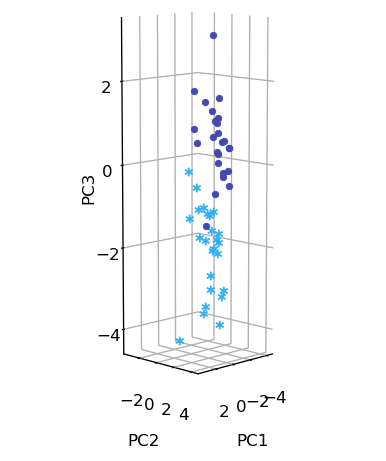

In [9]:
#%matplotlib notebook 
%matplotlib inline

diff_Ligs = LKB[(LKB["Substituent"]=='Me') | (LKB["Substituent"]=='OMe')]
diff_Ligs_index = diff_Ligs.index.to_list()

DR_t = 'PCA'
hue_str="Substituent"
pal = cm.get_cmap('turbo', 12).colors
pal = cm.get_cmap('turbo', 14).colors[1:-2]
    
hue=diff_Ligs[hue_str]
colors = {sus: p for sus, p in zip(LKB[hue_str].unique(), pal)}

df=DRs[DR_t]['DRdf'].iloc[diff_Ligs_index]

style=diff_Ligs["Substituent"]
styles = {'Me': ".", 'tBu': "$\circ$", 'OMe': "$*$", 'OPh': "$\diamond$", 'CF3': "$\star$", 'NMe2': (8,1,0), 
           'Ph': ".", 'C6F5': "$\circ$", 'o-Tol': "$*$",  'p-Tol': "$\diamond$", 'p-CF3-Ph': "$\star$"}

x=df[df.columns[0]]
y=df[df.columns[1]]
z=df[df.columns[2]]

fig = plt.figure(dpi = 120)
ax = fig.add_subplot(111, projection = '3d')
ax.set_box_aspect(aspect = (1,1,3.2))

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

for _s, _h, _x, _y, _z in zip(style, hue, x, y, z):
    ax.scatter(-_x, _y, _z, linewidth=0.5, color=colors[_h], marker=styles[_s], alpha=1, s=60)#0.25)

ax.set_xlabel(df.columns[0].upper())
ax.set_ylabel(df.columns[1].upper())
ax.set_zlabel(df.columns[2].upper(), rotation='vertical')


patchList = []
for key in colors:
        data_key = mpatches.Patch(color=colors[key], label=key)
        patchList.append(data_key)
        
ax.view_init(10, 45)

plt.show()

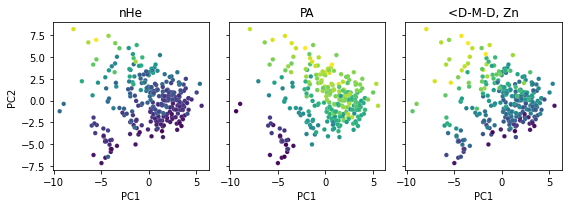

In [10]:
#%matplotlib notebook 
%matplotlib inline
matplotlib.rcParams.update({'font.size': 10})

DR_t = 'PCA'
palette='viridis' # viridis, magma, plasma, inferno, cividis, mako, rocket, turbo
hue_str=['nhe', 'pa', 'dmd.gla']
titles = {'nhe': 'nHe', 'pa': 'PA', 'dmd.gla': '<D-M-D, Zn'}

hue=LKB[hue_str]
df=DRs[DR_t]['DRdf']

f, axs = plt.subplots(1,3,
                      figsize=(8,3),
                      sharey=True)

for i, desc in enumerate(hue_str):
    sns.scatterplot(data=df,
        x=df[df.columns[0]],
        y=df[df.columns[1]],
        hue=LKB[desc],
        palette=palette,
        linewidth=0.1, 
        s=20, 
        alpha=1,
        legend=False,
        ax=axs[i]).set(title=titles[desc])
    
f.tight_layout()
plt.show()

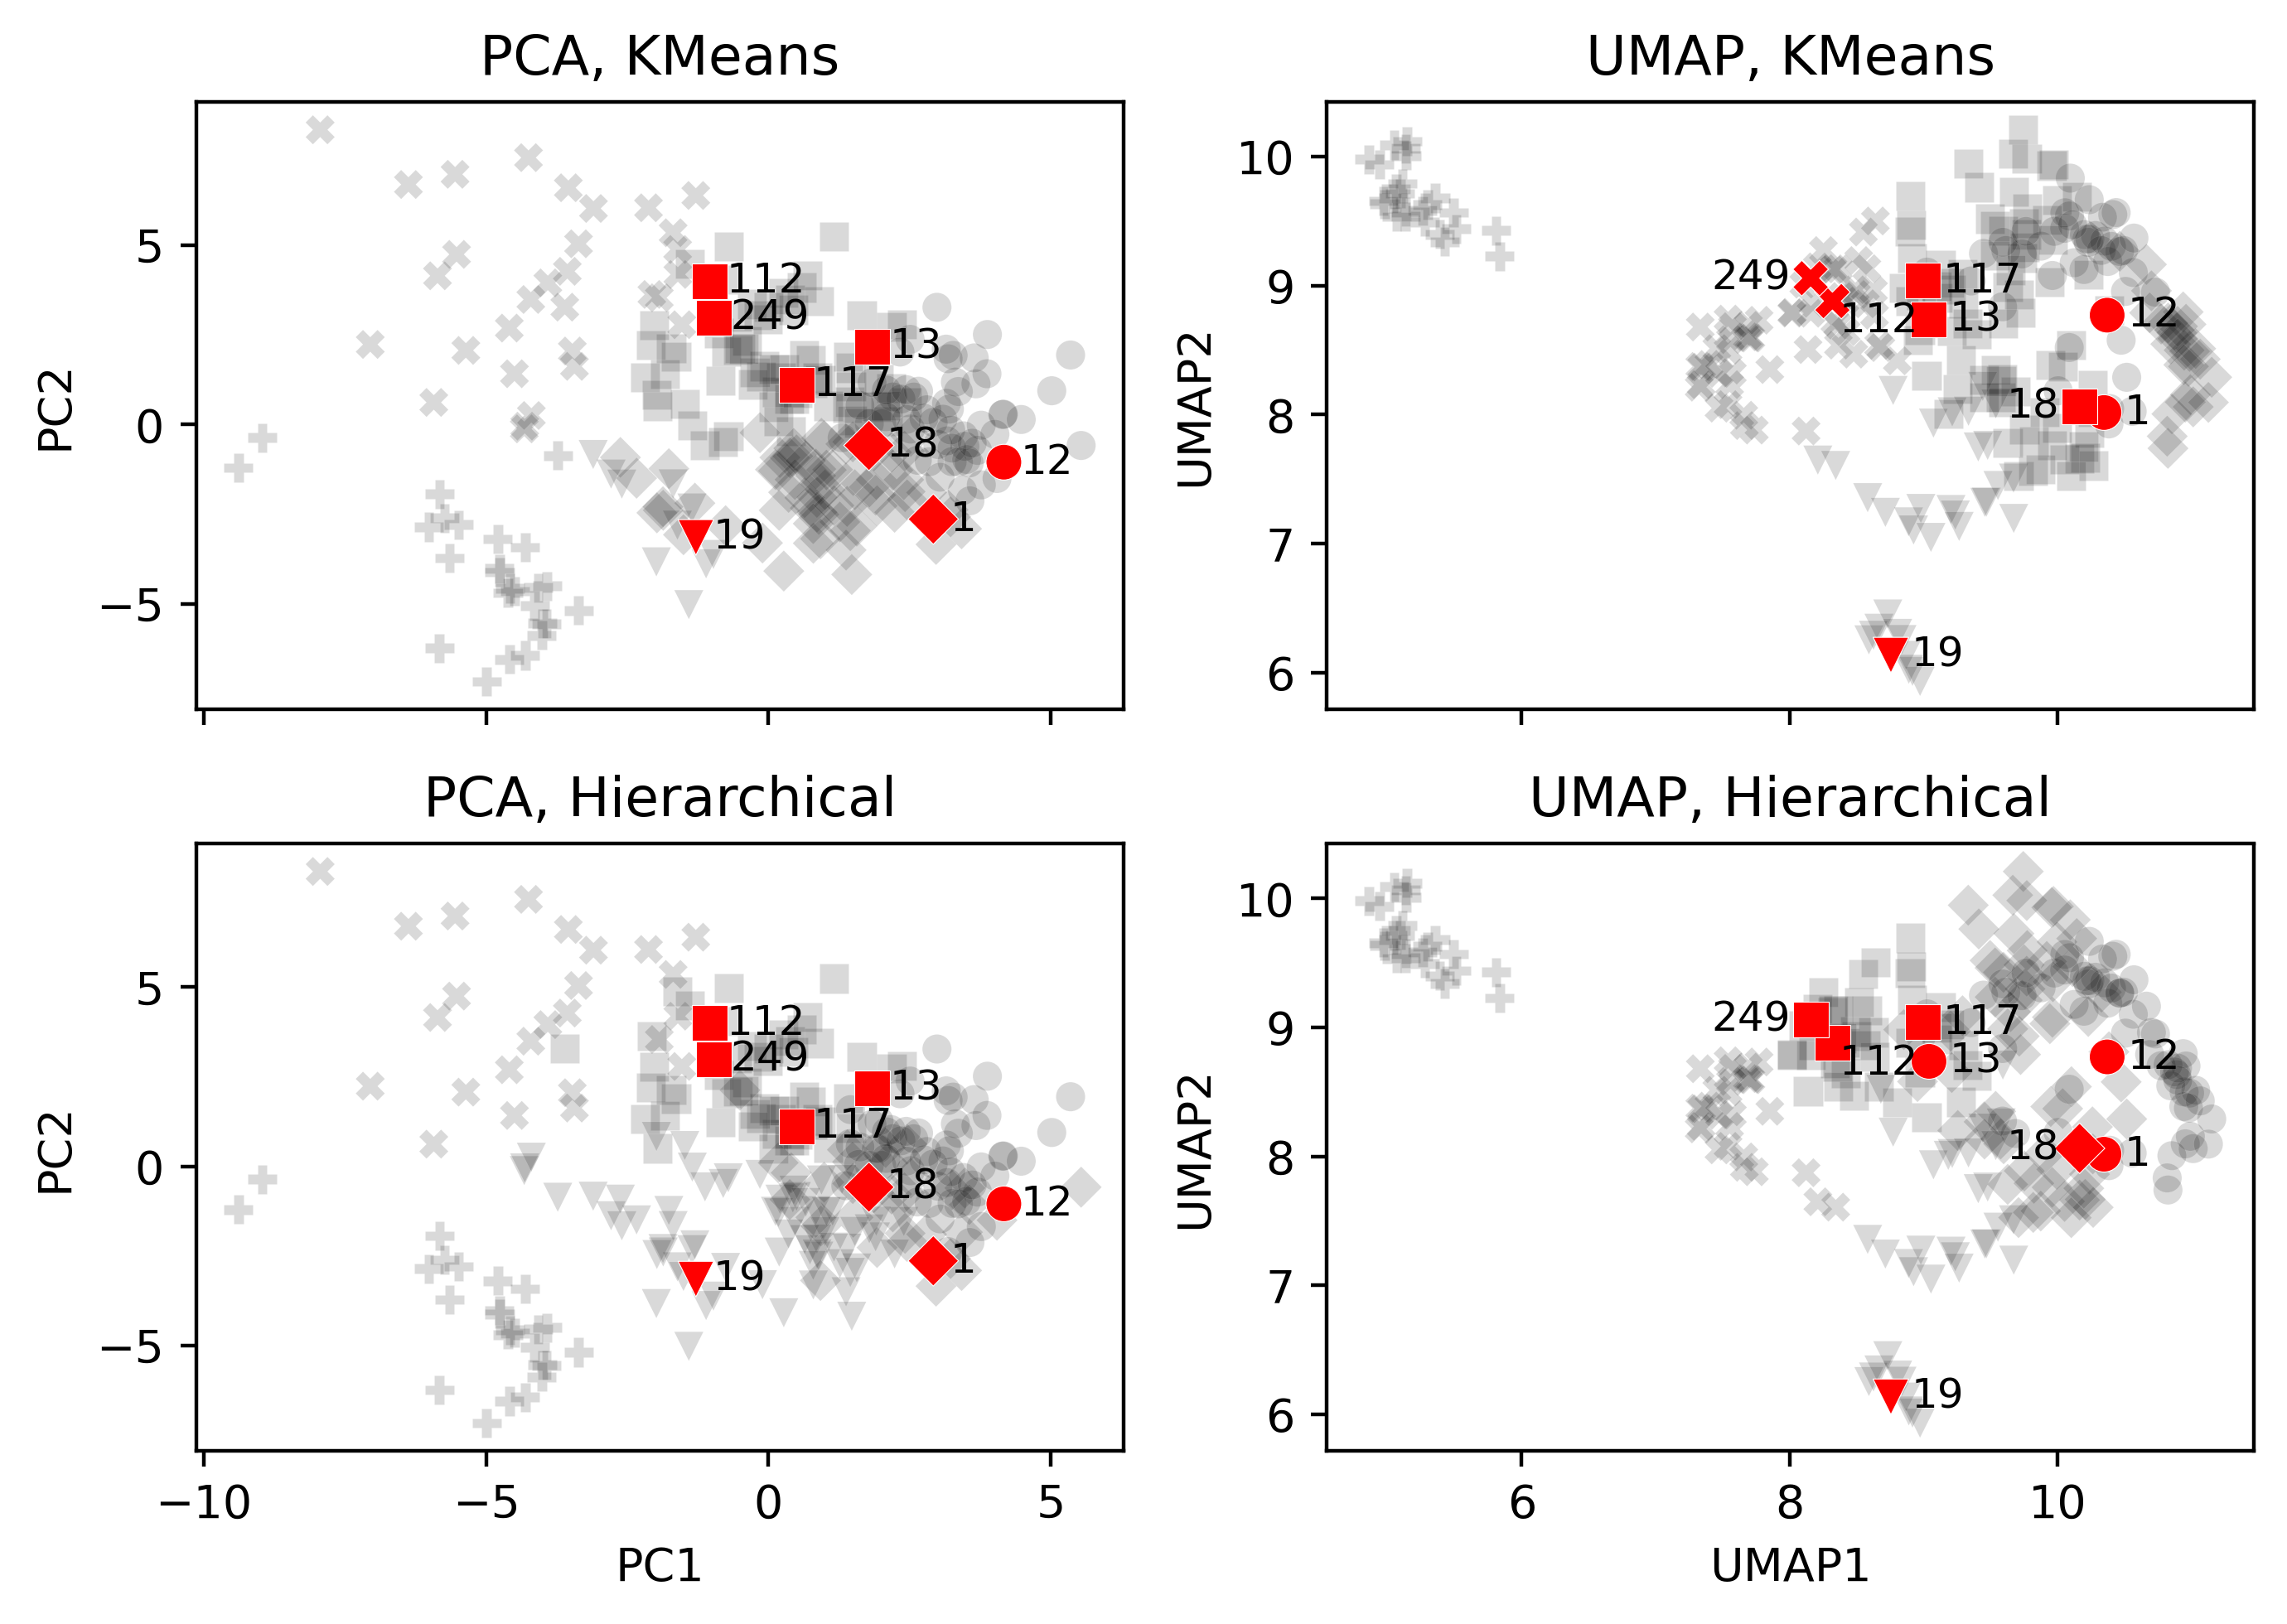

In [11]:
matplotlib.rcParams.update({'font.size': 10})
DR_ts = ['PCA','UMAP']

style  = {
    'PCAKMeans': Clusters['KMeans, PCA'],
    'UMAPKMeans': Clusters['KMeans, UMAP'],
    'PCAHierarchical': Clusters['Hierarchical, PCA'],
    'UMAPHierarchical': Clusters['Hierarchical, UMAP']
    }
markers = {
    'PCAKMeans': {0: "D", 1: "s", 2: "X", 3: "o", 4: "P", 5: "v"},
    'UMAPKMeans': {0: "D", 1: "X", 2: "s", 3: "P", 4: "o", 5: "v"},
    'PCAHierarchical': {0: "v", 1: "D", 2: "o", 3: "P", 4: "X", 5: "s"},
    'UMAPHierarchical': {0: "o", 1: "v", 2: "s", 3: "P", 4: "D", 5: "X"}
    }

f, axs = plt.subplots(2,2,
                      figsize=(7,5), dpi = 400,
                      sharex='col')
    

for i, DR_t in enumerate(DR_ts):
    for j, method in enumerate(['KMeans', 'Hierarchical']):
        df=DRs[DR_t]['DRdf']
        subset_ = df[df.index.isin(subset.index.values.tolist())]
        sns.scatterplot(data=df,
            x=df[df.columns[0]],
            y=df[df.columns[1]],
            color="black",
            linewidth=0.1, 
            s=40,
            style=style[DR_t + method],
            markers=markers[DR_t + method],
            alpha=0.15,
            legend=False,
            ax=axs[j,i]).set(title=''.join(
            c for c in DR_t if not c.isnumeric()) + ', ' + method)

        sns.scatterplot(data=subset_,
            x=subset_[subset_.columns[0]],
            y=subset_[subset_.columns[1]],
            color='red', 
            s=60,
            style=style[DR_t + method],
            markers=markers[DR_t + method],
            linewidth=0.2,
            alpha=1,
            legend=False,
            ax=axs[j,i])
        
        for k in subset_.index:
            x_ = subset_[subset_.columns[0]][k]
            y_ = subset_[subset_.columns[1]][k]

            
            if DR_t == 'PCA':
                axs[j,i].text(x_+0.3, y_, 
                    k+1, 
                    fontsize=9,
                    horizontalalignment='left',
                    verticalalignment='center',
                    backgroundcolor="none")
            else:
                axs[j,i].text(x_-.15 if k == 17 else x_-.15 if k == 248 else x_+0.05 if k == 111 else x_+.15, y_, 
                    k+1, 
                    fontsize=9,#
                    horizontalalignment='right' if k == 17 else 'right' if k == 248 else 'left',
                    verticalalignment="top" if k == 111 else'center',
                    backgroundcolor="none")

f.tight_layout()
plt.show()